# TP1 PROCESAMIENTO DEL HABLA

**Valentina Micaela Zoe Krabbe**


* Resolver las consignas comentando el código fuente, indicando desde dónde fue extraido o generado.

* Explicar y justificar cada paso realizado.

* Publique enlace público a su notebook en google colab y también enlace a su repositorio github de la materia.


### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

Extrae un texto de Internet de una sóla página web usando alguna de las técnicas de webscrapping vistas en clase. Busca el discurso de alguna persona quien te inspire o haya dado una charla motivadora.

No puedes repetir ni usar ni el mismo texto ni la misma web que otra persona quien ya entregó en el foro.

Abajo añade los bloques de código y texto necesarios. Explica paso a paso como descargaste el texto de tu interés.


In [1]:
#Instalamos las librerias necesarias
!pip install requests beautifulsoup4 spacy wordcloud

!python -m spacy download es

import requests #Para bajar la pagina web
from bs4 import BeautifulSoup #Para analizar el contenido de esta
import spacy
import string
import numpy as np
# instalar wordcloud
!pip install wordcloud


⚠ As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use the
full pipeline package name 'es_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 96.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
#Extraemos el texto desde la pagina web
url='https://fahho.mx/el-agua-en-el-rio-de-heraclito-la-transformacion-las-emociones-las-letras/#:~:text=Ning%C3%BAn%20hombre%20puede%20cruzar%20el,el%20agua%20ser%C3%A1n%20los%20mismos.&text=Este%20famoso%20aforismo%20del%20fil%C3%B3sofo%20j%C3%B3nico%20hace%20alusi%C3%B3n%20al%20cambio.'
response=requests.get(url) #Realizamos la peticion HTTP

#Se parsea el contenido HTML:
soup=BeautifulSoup(response.text,'html.parser')

#Buscamos el texto principal
parrafos=soup.find_all('p') #Buscamos todos los parrafos
texto=''.join([p.get_text() for p in parrafos])#Extraemos el texto de cada parrafo y se unen todos en un solo bloque
longitud_vocabulario = len(texto) #Caclulo de cantidad de caracteres en el texto
print("Longitud de mi vocabulario:", longitud_vocabulario)

print(texto[:1000])


Longitud de mi vocabulario: 4497
Ningún hombre puede cruzar el mismo río dos veces,porque ni el hombre ni el agua serán los mismos.HeráclitoEste famoso aforismo del filósofo jónico hace alusión al cambio. Y cómo no va a hacerlo si el efecto principal del agua es la transformación de todo lo que toca. Desde sus consecuencias en la naturaleza, como la formación de cañones completos gracias a la erosión o, incluso, la forma en la que están constituidos los continentes, posterior a la Pangea; estalactitas y estalagmitas y hasta el cuerpo de los seres vivos. Solo el ser humano comparte el podio con el agua en esta faceta transformadora.Como buen visitante que llegó para quedarse —justo porque proviene del espacio—, el agua constituye, en porcentaje, la mayor parte del planeta, habitando en seres vivos y fuera de ellos, en estado “natural”. Podríamos afirmar, como lo señala la famosa frase “Nada se destruye, sino que todo se transforma”, que el agua que habita actualmente el planeta lo ha he

## 2- Preprocesamiento

In [3]:
#Le avisamos a python que vamos a trabajar con textos en español
nlp=spacy.load('es_core_news_sm')

### 2.1 Muestra las stop words (palabras que no aportan mucho valor para analisar) que tenga tu texto.


In [4]:
#Imprimimos las stopwords del español en el texto
stopwords = spacy.lang.es.stop_words.STOP_WORDS
print('Numero de stop words:',len(stopwords))
print('Las stop words son:',list(stopwords))


Numero de stop words: 521
Las stop words son: ['poner', 'diez', 'que', 'pocas', 'pueden', 'todo', 'tienen', 'están', 'ahora', 'cinco', 'allí', 'ser', 'arriba', 'tuya', 'próximo', 'se', 'informo', 'fueron', 'entonces', 'nueve', 'cuánto', 'vez', 'ninguna', 'aquella', 'vais', 'junto', 'uno', 'quiere', 'otra', 'aquellas', 'e', 'podrian', 'varios', 'nuevo', 'ambos', 'estaba', 'todavia', 'ir', 'ningunas', 'sabeis', 'vuestro', 'ahi', 'eres', 'habia', 'verdadera', 'vamos', 'detrás', 'mediante', 'sois', 'mismos', 'mí', 'través', 'grande', 'considera', 'encuentra', 'dejó', 'usamos', 'su', 'tengo', 'nuevas', 'buenos', 'mios', 'esta', 'poco', 'mal', 'tenido', 'eramos', 'dado', 'van', 'será', 'era', 'algunas', 'encima', 'propio', 'incluso', 'mucha', 'eras', 'fin', 'da', 'dan', 'tendrán', 'ciertas', 'teneis', 'sola', 'habían', 'yo', 'dio', 'aun', 'tampoco', 'consideró', 'aproximadamente', 'dieron', 'también', 'hoy', 'quiénes', 'segunda', 'mío', 'expresó', 'ningunos', 'podriamos', 'luego', 'mayor', '

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [14]:
import re
def limpiar_texto(texto):
  #Primero pasamos todo a minusculas:
  texto=texto.lower()
  #Eliminamos URLs y signos de puntuacion:
  texto=re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
  #Eliminamos nuemeros:
  texto=re.sub(r'\d+', '', texto)


  #Procesamos el texto:
  doc=nlp(texto)
  return doc

#Procesamos el texto limpio:
doc=limpiar_texto(texto)


In [6]:
from wordcloud import WordCloud #Para generar la nube
import matplotlib.pyplot as plt

#Filtramos solo las palabras que no sean stopwords y sean alfabeticas
palabras_filtradas=[token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in stopwords]

#Unimos todas las palabras limpias en un solo string
texto_filtrado = " ".join(palabras_filtradas)

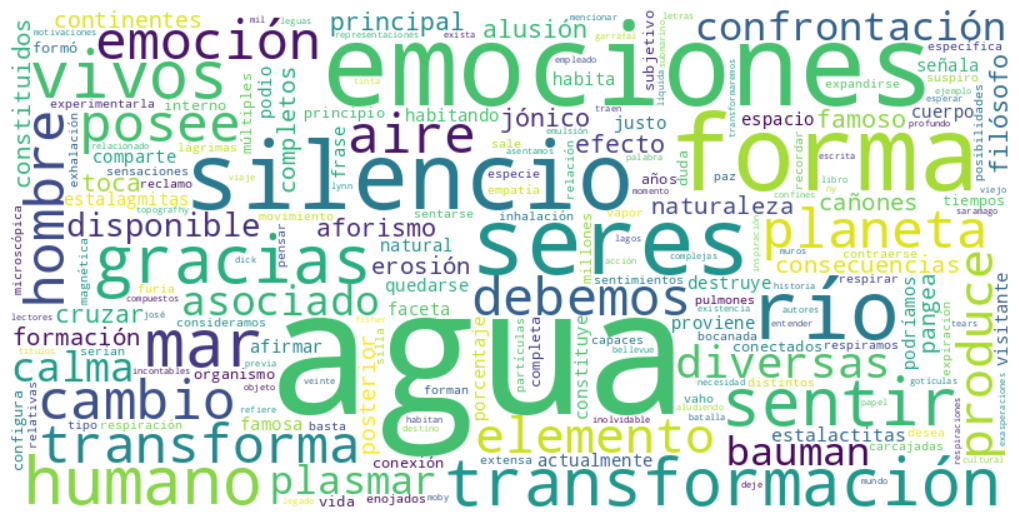

In [7]:
#Creamos la nube de palabras
nube=WordCloud(width=800,height=400,background_color='white').generate(texto_filtrado)

plt.figure(figsize=(10,5),facecolor=None)
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#Descomponemos el texto en oraciones:
oraciones=[sent.text.strip() for sent in doc.sents if len(sent.text.strip())>10]

#Mostramos algunas oraciones como ejemplo:
print('Ejemplo de oraciones:\n')
for i, oracion in enumerate(oraciones[:5]):
  print(f'{i+1}. {oracion}')

Ejemplo de oraciones:

1. ningún hombre puede cruzar el mismo río dos veces,porque ni el hombre ni el agua serán los mismos.heráclitoeste famoso aforismo del filósofo jónico hace alusión al cambio.
2. y cómo no va a hacerlo si el efecto principal del agua es la transformación de todo lo que toca.
3. desde sus consecuencias en la naturaleza, como la formación de cañones completos gracias a la erosión o, incluso, la forma en la que están constituidos los continentes, posterior a la pangea; estalactitas y estalagmitas y hasta el cuerpo de los seres vivos.
4. solo el ser humano comparte el podio con el agua en esta faceta transformadora.como buen visitante que llegó para quedarse —justo porque proviene del espacio—, el agua constituye, en porcentaje, la mayor parte del planeta, habitando en seres vivos y fuera de ellos, en estado “natural”.
5. podríamos afirmar, como lo señala la famosa frase “nada se destruye, sino que todo se transforma”, que el agua que habita actualmente el planeta lo 

##**Matriz Documento-Vocabulario**

In [9]:
#Creamos la matriz documento-vocabulario
vect=CountVectorizer(stop_words=list(stopwords)) #CountVectorizer crea una tabla donde cada fila es una oracion y cada columna una palabra
X=vect.fit_transform(oraciones) #Ajusta el vectorizador y transforma las oraciones en numeros (frecuencias de palabras)
vocabulario=vect.get_feature_names_out() #Obtiene las palabras unicas del vocabulario

#Dimensiones de la matriz:
print(f"\nLa matriz tiene forma: {X.shape} (documentos x vocabulario)")
print(f"Cantidad de palabras en el vocabulario: {len(vocabulario)}")
print("Primeras 20 palabras del vocabulario:", vocabulario[:20])


La matriz tiene forma: (29, 248) (documentos x vocabulario)
Cantidad de palabras en el vocabulario: 248
Primeras 20 palabras del vocabulario: ['_amor_liquido' 'acción' 'actualmente' 'afirmar' 'aforismo' 'agua' 'aire'
 'alfredo' 'aludiendo' 'alusión' 'amor' 'asentamos' 'asociado' 'asociados'
 'autores' 'aviso' 'años' 'barcelona' 'basta' 'batalla']


In [10]:
#Veamos como es la matriz
import pandas as pd
df_matriz=pd.DataFrame(X.toarray(),columns=vocabulario)
df_matriz.head()

,_amor_liquido,acción,actualmente,afirmar,aforismo,agua,aire,alfredo,aludiendo,alusión,...,vaho,vapor,veinte,viaje,vida,viejo,visitante,vivos,vínculos,zygmunt
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0



#### 2.3.2 Determina la longitud de tu vocabulario.

In [11]:
long=len(vocabulario)
print(f'La longitud del vocabulario es: {long}')

La longitud del vocabulario es: 248



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

**TF-IDF le da un pesoa a cada palabra, segun que tanto aparece en una oracion y que tan comun es en el resto del texto. Permitiendo destacar las palabras importantes y no solo las que mas se repiten**


In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

# Aplica TF-IDF a la matriz documento-vocabulario=(X)
# TfidfTransformer toma la matriz de "counts" (frecuencias) y calcula la matriz TF-IDF
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# 'X_tfidf' es ahora la matriz con los valores TF-IDF. Es una matriz dispersa.
# Para verla de forma tabular:
df_tfidf_matriz = pd.DataFrame(X_tfidf.toarray(), columns=vocabulario)

# Muestra la forma de la matriz TF-IDF (debe ser igual a la de X)
print(f"La matriz TF-IDF tiene forma: {X_tfidf.shape} (documentos x vocabulario)")

# Muestra las primeras filas de la matriz TF-IDF para ver los valores calculados
print("\nMatriz TF-IDF (primeras 5 filas):")
print(df_tfidf_matriz.head())

La matriz TF-IDF tiene forma: (29, 248) (documentos x vocabulario)

Matriz TF-IDF (primeras 5 filas):
   _amor_liquido  acción  actualmente   afirmar  aforismo      agua  aire  \
0            0.0     0.0     0.000000  0.000000  0.277498  0.121879   0.0   
1            0.0     0.0     0.000000  0.000000  0.000000  0.223726   0.0   
2            0.0     0.0     0.000000  0.000000  0.000000  0.000000   0.0   
3            0.0     0.0     0.000000  0.000000  0.000000  0.215690   0.0   
4            0.0     0.0     0.242483  0.242483  0.000000  0.106501   0.0   

   alfredo  aludiendo   alusión  ...  vaho  vapor  veinte  viaje  vida  viejo  \
0      0.0        0.0  0.277498  ...   0.0    0.0     0.0    0.0   0.0    0.0   
1      0.0        0.0  0.000000  ...   0.0    0.0     0.0    0.0   0.0    0.0   
2      0.0        0.0  0.000000  ...   0.0    0.0     0.0    0.0   0.0    0.0   
3      0.0        0.0  0.000000  ...   0.0    0.0     0.0    0.0   0.0    0.0   
4      0.0        0.0  0.00000

##Que podemos ver?

Si el valor es alto (cercano a 1) → significa que esa palabra es clave para esa oración, y no aparece tan seguido en otras.
...........................................................................

Si el valor es bajo o cercano a 0 → la palabra no es tan representativa, quizás aparece en muchas partes del texto o no aporta mucha distinción.


Hay 29 oraciones y 248 palabras distintas en el vocabulario:

En la fila 0:
La palabra 'aforismo' tiene un valor de 0.277498, lo que indica que es relevante para la oracion [0], pero probablemente no aparece en otras oraciones.


# Conclusiones

En este trabajo práctico se logró recorrer lo aprendido sobre el proceso de análisis de un texto, desde la obtención de él con su URL, hasta la visualización y análisis mediante técnicas de procesamiento del lenguaje natural aprendido hasta ahora en la materia.

WEBSCRAPING: aprendí como descargar un texto de la web.

PREPROCESAMIENTO DE DATOS:aprendí como con SpaCy podemos limpiar un texto, como aprendimos con los dataset, pero ahora con el habla humana. Que es igual de clave como el ETL en los datasets que veníamos trabajando en la carrera.

NUBE DE PALABRAS: confieso que antes había visto imágenes así de nubes de palabras en internet o en revistas, pero nunca me imagine que se pudiesen crear de esta manera. Una herramienta visual muy clara.

TF-IDF y Matrices: Me costó bastante este punto, pero lo hice, también es una herramienta muy importante para poder ver la construcción de los textos y ver un poco más por detrás para comprenderlo mejor.


Fue muy interesante este primer contacto con el estudio del procesamiento del habla. Un buen paso para comenzar a comprender más la materia.

# ENTREGA

